In [9]:
#get current working directory
import os
cwd = os.getcwd()
cwd
os.chdir('C:\\Users\\mazzucas\\Documents\\DM\\PDISC\\CERBERUS project\\estrazioni cdm_sdm')

In [14]:
#Import dataset
import pandas
df = pandas.read_csv('ver_csv_171201.csv',sep=';')
print(df.head(5))

                                COD_CLIENTE_CIFRATO DAT_PRIMA_ATTIV_CNTR_dt  \
0  002d0c39500428416bac9e40c9ab8f435d344625c5af421e              2006-12-18   
1  0210f05c16433eb27a8fa467787f9db048c0701d87b2a8ba              2004-03-03   
2  03421b1ff7e6d6e6ede5313036dbbe72f5abf65676920269              2009-11-02   
3  0e90bc139a523fda39f9f97ecad1780dc9e181cfaa476fac              2000-10-28   
4  0f4567e9cc6ad91ced8c6dc85909da705f493563c9b3bff7              2004-01-26   

   decile_cdm  score_cdm  fascia_1_sdm  score_1_sdm  fascia_4_sdm  \
0        10.0   0.036275             8     0.003199             9   
1         NaN        NaN             9     0.001797             5   
2         NaN        NaN             2     0.017093             2   
3         5.0   0.098166            10     0.001546            10   
4         4.0   0.116511             2     0.016134             9   

   score_4_sdm pdisc1 pdisc2  
0     0.009437    NaN    NaN  
1     0.024827    NaN    NaN  
2     0.111636   

In [8]:
#create a new column of prediction normalized:
col_to_norm = ['prediction']
df['prediction_normalized'] = df[col_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(df.head(5))

In [26]:
#Print summary:
df.describe()

,prediction,decile,prediction_normalized,division
count,1.521526e+06,1.521526e+06,1.521526e+06,1.521526e+06
mean,1.417941e-01,5.499992e+00,1.377147e-01,7.530032e-02
std,1.476925e-01,2.872281e+00,1.434672e-01,1.528232e-01
min,2.356106e-05,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.528123e-02,3.000000e+00,4.396291e-02,5.495364e-03
50%,9.044719e-02,5.000000e+00,8.783674e-02,1.756735e-02
75%,1.411832e-01,8.000000e+00,1.371213e-01,4.570709e-02
max,1.029475e+00,1.000000e+01,1.000000e+00,1.000000e+00


(array([872003., 338954., 173171.,  47447.,  33248.,  10014.,  32896.,
          3711.,   6788.,   3294.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

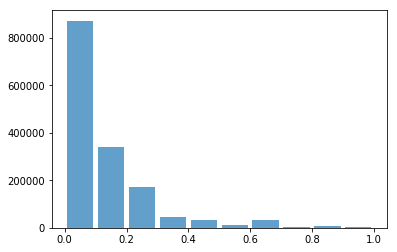

In [18]:
#Plot the histogram of prediction normalized:
import matplotlib.pyplot as plt
plt.hist(x=df['prediction_normalized'],
                            alpha=0.7, rwidth=0.85)

(array([152153., 152153., 152153., 152153., 152153., 152153., 152152.,
        152152., 152152., 152152.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

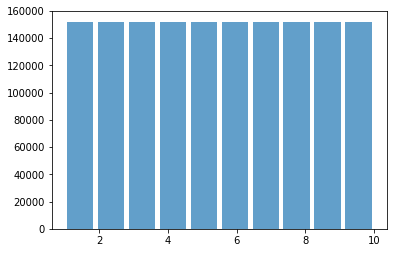

In [28]:
#Plot the histogram of decile:
import matplotlib.pyplot as plt
plt.hist(x=df['decile'],alpha=0.7, rwidth=0.85)

In [ ]:
CICLO FOR per NORMALIZZARE piuDataFrame

In [16]:
#create the index of the dates to be inserted into each dataset title:
index=[171201,171216,180101,180116,180201,180216,180301,180316,180401,180416,180501,180516,180601,180616,180701,180716,180801,180816,180901,180916,181001,181016,181101,181116,181201,181216]
print(index)
print(len(index)) #should be 26

[171201, 171216, 180101, 180116, 180201, 180216, 180301, 180316, 180401, 180416, 180501, 180516, 180601, 180616, 180701, 180716, 180801, 180816, 180901, 180916, 181001, 181016, 181101, 181116, 181201, 181216]
26


In [17]:
#Upload 26 datasets, normalize one columnn and create a csv file for each of the 26 datasets into the folder 'normalize' in the cwd:
for i in index:
    filepath = os.path.join('C:\\Users\\mazzucas\\Documents\\DM\\PDISC\\CERBERUS project\\estrazioni cdm_sdm', 'ver_csv_'+str(i)+'.csv')
    df = pandas.read_csv(filepath,sep=';')
    col_to_norm = ['score_cdm']
    df['score_cdm_normalized'] = df[col_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    #print(df.head(5))
    filepath = os.path.join('estrazioni_cdm_sdm_normalized', 'dataset_'+str(i)+'.csv')
    df.to_csv(filepath)
    #df.to_csv('C:\Users\cambierie\Desktop\prova.csv',sep=';')

In [23]:
prova = pandas.read_csv('C:\\Users\\mazzucas\\Documents\\DM\\PDISC\\CERBERUS project\\estrazioni cdm_sdm\\estrazioni_cdm_sdm_normalized\\dataset_180301.csv',sep=',')

In [24]:
print(prova.head(5))

   Unnamed: 0                               COD_CLIENTE_CIFRATO  \
0           0  00d54f52278c11e11f213b67a196006edc78fffdabf3334e   
1           1  051f124b978b9a732c0ba231084db6e21aa3ddb3cdb98eaf   
2           2  0528832808c6afb9e258ebfb69a77eee4c32ad906240282f   
3           3  056582af4e64d8556069c376307e8e2b31d7600785ecc4db   
4           4  06412c16d2126c6047056628567cea819c1913432ad90c05   

  DAT_PRIMA_ATTIV_CNTR_dt  decile_cdm  score_cdm  fascia_1_sdm  score_1_sdm  \
0              2014-11-01         1.0    0.30342             6     0.004660   
1              2014-06-07         NaN        NaN             9     0.001863   
2              2006-01-27         NaN        NaN             9     0.002062   
3              2010-04-27         NaN        NaN             6     0.005096   
4              2016-01-27         NaN        NaN             1     0.021713   

   fascia_4_sdm  score_4_sdm pdisc1 pdisc2  score_cdm_normalized  
0             5     0.028521    NaN    NaN             

In [25]:
prova.describe()

,Unnamed: 0,decile_cdm,score_cdm,fascia_1_sdm,score_1_sdm,fascia_4_sdm,score_4_sdm,score_cdm_normalized
count,3.950381e+06,1.480510e+06,1.480510e+06,3.950381e+06,3.950381e+06,3.950381e+06,3.950381e+06,1.480510e+06
mean,1.975190e+06,5.499029e+00,1.355885e-01,5.505116e+00,9.920758e-03,5.608834e+00,4.097209e-02,1.455648e-01
std,1.140377e+06,2.872304e+00,1.480486e-01,2.832100e+00,1.892094e-02,2.844713e+00,5.915297e-02,1.383537e-01
min,0.000000e+00,1.000000e+00,-2.017660e-02,1.000000e+00,3.731520e-05,1.000000e+00,2.141365e-04,0.000000e+00
25%,9.875950e+05,3.000000e+00,4.108433e-02,3.000000e+00,2.845865e-03,3.000000e+00,1.184099e-02,5.724927e-02
50%,1.975190e+06,5.000000e+00,8.847707e-02,6.000000e+00,5.201872e-03,6.000000e+00,2.222879e-02,1.015385e-01
75%,2.962785e+06,8.000000e+00,1.387697e-01,8.000000e+00,9.718921e-03,8.000000e+00,4.517160e-02,1.485377e-01
max,3.950380e+06,1.000000e+01,1.049897e+00,1.000000e+01,8.068782e-01,1.000000e+01,9.736037e-01,1.000000e+00
